# Simulation Analyser

## Import relevant libraries

In [19]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import os
import quantstats as qs

import sqlite3
from sqlalchemy import create_engine

## Parameters

In [26]:
config_file_name = "config_msc_BTCUSDT_15m_feat_package2.ini"
config_file_name_without_extension = config_file_name.replace(".ini", "")

## Get the data

In [27]:
def get_and_process_simulation_data(config_file_name_without_extension):
    try:
        
        # Get the data
        db_address = 'sqlite:///../results/data/db/simulation.db'
        engine = create_engine(db_address, echo=False)
        sqlite_connection = engine.connect()

        input_tbl_name = "tbl_simulation_results" + "_" + config_file_name_without_extension
        
        sql_command = "SELECT * FROM " + input_tbl_name

        df = pd.read_sql(sql_command, sqlite_connection)

        sqlite_connection.close()

        return df

    except Exception as e:
        print(e)

### Simulation Results

In [28]:
df_simulation_results = get_and_process_simulation_data(config_file_name_without_extension)

In [29]:
fig = px.box(df_simulation_results, y="fmt_total_profit_percentage", color="model_type", points="all", color_discrete_sequence=[ "#FF7F0E", "#00CC96", "#10aded", "#8A56EF"],  width=800, height=600)
fig.show()

In [30]:
fig = px.histogram(df_simulation_results, x="fmt_total_profit_percentage", color="model_type", color_discrete_sequence=[ "#FF7F0E", "#00CC96", "#10aded", "#8A56EF"],  width=800, height=600, marginal="rug", # can be `box`, `violin`
                         hover_data=['total_reward_cash','fmt_total_profit_percentage', 'num_of_trades', 'sim_id'])
fig.show()

In [31]:
fig = px.histogram(df_simulation_results, x="num_of_trades", color="model_type", color_discrete_sequence=[ "#FF7F0E", "#00CC96", "#10aded", "#8A56EF"],  width=800, height=600, marginal="rug", # can be `box`, `violin`
                         hover_data=['total_reward_cash','fmt_total_profit_percentage', 'num_of_trades', 'sim_id'])
fig.show()

### Robot Actions & Env data

In [32]:
sim_id = 271

In [33]:
def get_and_process_robot_actions_and_env_data(config_file_name_without_extension, sim_id):
    try:
        
        # Get the data
        db_address = 'sqlite:///../results/data/db/simulation.db'
        engine = create_engine(db_address, echo=False)
        sqlite_connection = engine.connect()

        input_tbl_name = "tbl_robot_actions_and_env" + "_" + config_file_name_without_extension
        
        sql_command = "SELECT * FROM " + input_tbl_name
        
        sql_append = " WHERE " + "sim_id = " + str(sim_id)
        
        sql_command = sql_command + sql_append

        df = pd.read_sql(sql_command, sqlite_connection)

        sqlite_connection.close()

        return df

    except Exception as e:
        print(e)

In [34]:
df_robot_actions_and_env = get_and_process_robot_actions_and_env_data(config_file_name_without_extension, sim_id)

In [37]:
fig = px.line(df_robot_actions_and_env, x="dates", y="prices", color_discrete_sequence=['#969696'])
fig.add_trace(go.Scatter(name='Hold', x=df_robot_actions_and_env[df_robot_actions_and_env['actions'] == 2]['dates'], y=df_robot_actions_and_env[df_robot_actions_and_env['actions'] == 2]['prices'], mode='markers', marker_symbol='circle', marker_color='#0064c8'))
fig.add_trace(go.Scatter(name='Buy', x=df_robot_actions_and_env[df_robot_actions_and_env['actions'] == 1]['dates'], y=df_robot_actions_and_env[df_robot_actions_and_env['actions'] == 1]['prices'], mode='markers', marker_symbol='triangle-up', marker_size=10, marker_color='#228b22'))
fig.add_trace(go.Scatter(name='Sell', x=df_robot_actions_and_env[df_robot_actions_and_env['actions'] == 0]['dates'], y=df_robot_actions_and_env[df_robot_actions_and_env['actions'] == 0]['prices'], mode='markers', marker_symbol='triangle-down', marker_size=10, marker_color='#c83232'))

fig.show()

                           Strategy
-------------------------  ----------
Start Period               2022-01-01
End Period                 2022-12-30
Risk-Free Rate             0.0%
Time in Market             2.0%

Cumulative Return          11.51%
CAGR﹪                     11.58%

Sharpe                     0.09
Prob. Sharpe Ratio         83.19%
Smart Sharpe               0.09
Sortino                    0.12
Smart Sortino              0.12
Sortino/√2                 0.09
Smart Sortino/√2           0.09
Omega                      1.18

Max Drawdown               -12.86%
Longest DD Days            208
Volatility (ann.)          0.97%
Calmar                     0.9
Skew                       -13.06
Kurtosis                   3770.59

Expected Daily %           0.0%
Expected Monthly %         0.91%
Expected Yearly %          11.51%
Kelly Criterion            7.66%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.1%
Expected Shortfall (cVaR)  -0.1%

Max Consecutive Wins       

None

Start      Valley         End  Days  Max Drawdown  99% Max Drawdown
1  2022-06-05  2022-08-30  2022-12-30   208    -12.862504        -12.794626
2  2022-01-25  2022-02-04  2022-02-08    14     -1.941493         -1.927037
3  2022-02-10  2022-02-24  2022-02-28    18     -1.534563         -1.531303
4  2022-03-10  2022-03-23  2022-04-06    26     -1.467330         -1.438379
5  2022-04-07  2022-05-05  2022-05-09    32     -1.415884         -1.405253

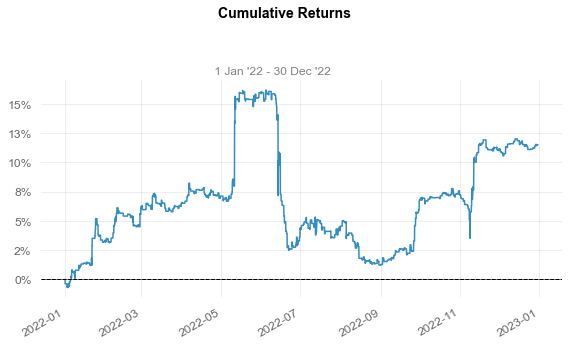

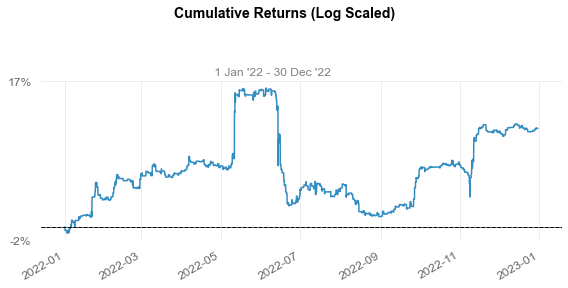

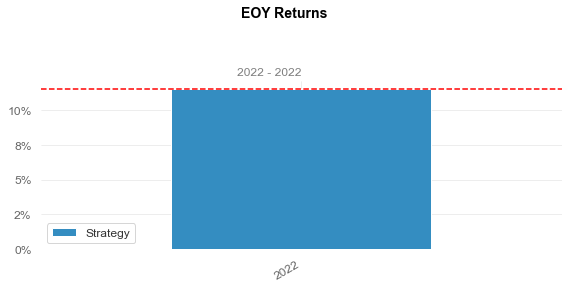

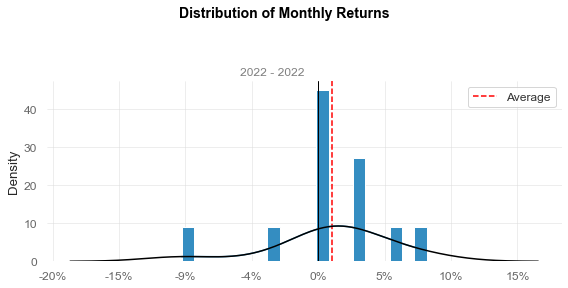

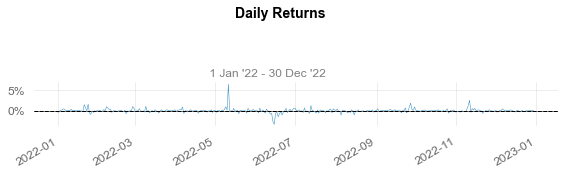

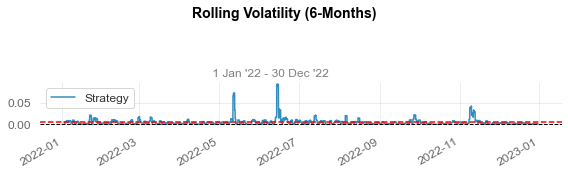

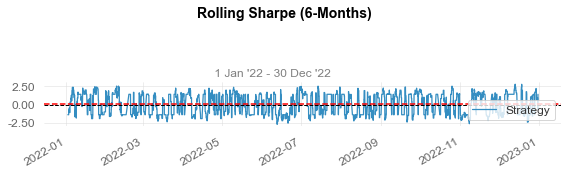

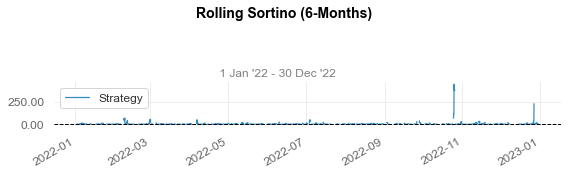

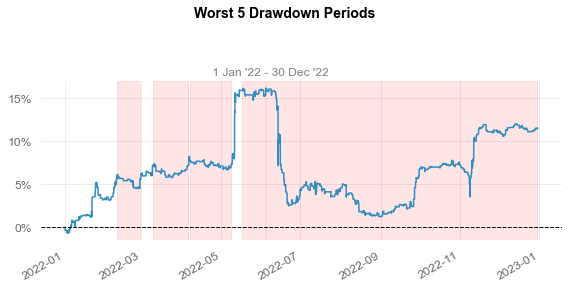

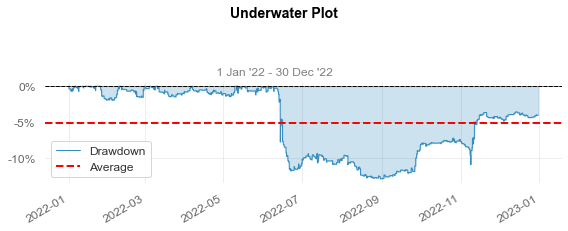

/opt/homebrew/Caskroom/miniforge/base/envs/msc_uol_ai_dissertation/lib/python3.8/site-packages/quantstats/stats.py:968: FutureWarning:

In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.



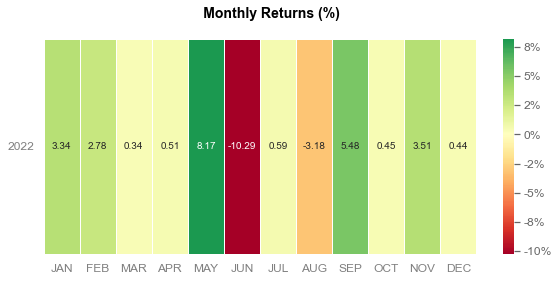

/opt/homebrew/Caskroom/miniforge/base/envs/msc_uol_ai_dissertation/lib/python3.8/site-packages/seaborn/categorical.py:82: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



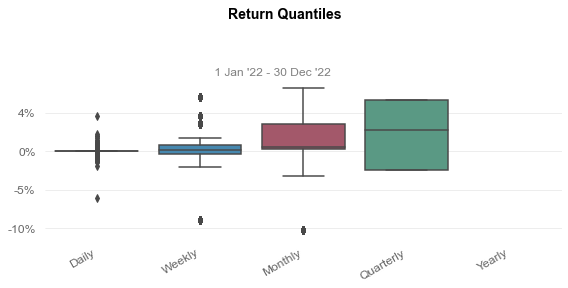

In [36]:
qs.extend_pandas()

df_temp = df_robot_actions_and_env.copy()
df_temp['Date'] = pd.to_datetime(df_temp['dates'])
df_temp.set_index('Date', inplace=True)

net_worth = pd.Series(df_temp['total_profit_percentage'], index=df_temp.index[6:])
returns = net_worth.pct_change().iloc[1:]

qs.reports.full(returns)